In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
dfh13 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB13H.csv')
dfh12 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB12H.csv')
dfh11 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB11H.csv')
dfh10 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB10H.csv')

In [93]:
dfp13 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB13P.csv')
dfp12 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB12P.csv')
dfp11 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB11P.csv')
dfp10 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB10P.csv')

## Data Cleaning

In [94]:
# Household data
dfh13 = dfh13.rename(columns={'hid13':'hid'})
dfh12 = dfh12.rename(columns={'hid12':'hid'})
dfh11 = dfh11.rename(columns={'hid11':'hid'})
dfh10 = dfh10.rename(columns={'hid10':'hid'})

# Individual data
dfp13 = dfp13.rename(columns={'pid13':'pid'})
dfp12 = dfp12.rename(columns={'pid12':'pid'})
dfp11 = dfp11.rename(columns={'pid11':'pid'})
dfp10 = dfp10.rename(columns={'pid10':'pid'})

### Household Dataset

In [115]:
# Head of Houshold Demographic data
def hhinfo(df, year):
    yr = year
    ayr = yr + 2007
    df['female'] = np.NaN
    df['marriage'] = np.NaN
    df['age'] = np.NaN
    df['education'] = np.NaN
    df['unemployed'] = np.NaN
    df['wage-employed'] = np.NaN
    df['self-employed'] = np.NaN
    df['income'] = np.NaN
    df['pid'] = np.NaN

    var = [f'w{yr}rel0{i}' for i in range(1,10)]
    head_no = []
    for n in range(df.shape[0]):
        for m,j in enumerate(var):
            if df.loc[n,j] == 1:
                # Head of household PID(personal ID)
                head_no.append(j[-2:])
                df.loc[n,'pid'] = int((df.loc[n,'hid']*100) + int(j[-2:]))
                # gender: female = 1 / if not = 0
                if df.loc[n,f'w{yr}gen0{m+1}'] == 2:
                    df.loc[n,'female'] = 1
                else:
                    df.loc[n,'female'] = 0
                # marriage: partner = 1 / if not = 0
                if df.loc[n,f'w{yr}mar0{m+1}'] == 1:
                    df.loc[n,'marriage'] = 1
                else:
                    df.loc[n,'marriage'] = 0
                # age = survey year - (birth year + birth month / 12)
                df.loc[n,'age'] = round(ayr - (df.loc[n,f'w{yr}byr0{m+1}']+(df.loc[n,f'w{yr}bmn0{m+1}']/12)),2)
                # education: four-year college = 1 / if not = 0
                if df.loc[n,f'w{yr}edu0{m+1}'] == -9:
                    df.loc[n,'education'] = np.NaN
                elif df.loc[n,f'w{yr}edu0{m+1}'] > 5:
                    df.loc[n,'education'] = 1
                else:
                    df.loc[n,'education'] = 0
                # unemployed: unemployed = 1 / if not = 0
                if df.loc[n,f'w{yr}job0{m+1}'] == -9:
                    df.loc[n,'unemployed'] = np.NaN
                elif df.loc[n,f'w{yr}job0{m+1}'] > 11:
                    df.loc[n,'unemployed'] = 1
                else:
                    df.loc[n,'unemployed'] = 0
                # wage employed: wage employed = 1 / if not =0
                if df.loc[n,f'w{yr}jpo0{m+1}'] == -9:
                    df.loc[n,'wage-employed'] = np.NaN
                elif df.loc[n,f'w{yr}jpo0{m+1}'] < 4:
                    df.loc[n,'wage-employed'] = 1
                else:
                    df.loc[n,'wage-employed'] = 0
                # self-employed
                if df.loc[n,f'w{yr}jpo0{m+1}'] == -9:
                    df.loc[n,'self-employed'] = np.NaN
                elif df.loc[n,f'w{yr}jpo0{m+1}'] > 3:
                    df.loc[n,'self-employed'] = 1
                else:
                    df.loc[n,'self-employed'] = 0
                # income = income equalization = hh income / root(hh member number)
                if df.loc[n,f'h{yr}ca004'] == -9:
                    df.loc[n,'income'] = np.NaN
                else:
                    df.loc[n,'income'] = round(df.loc[n,f'h{yr}ca004'] / np.sqrt(df.loc[n,f'w{yr}fnum']),3)

In [116]:
hhinfo(dfh10, 10)
hhinfo(dfh11, 11)
hhinfo(dfh12, 12)
hhinfo(dfh13, 13)

In [117]:
# Demographic
info = ['female', 
        'marriage', 
        'age',
        'education',
        'unemployed',
        'wage-employed',
        'self-employed',
        'income']

# Financial assets
fin = ['deposit',
           'fund',
           'bond',
           'stock',
           'insurance',
           'lend',
           'other',
           'mortage',
           'pension']

financial = [f'fa00{i}' for i in range(2,10,2)] + \
      [f'fa0{i}' for i in range(10,20,2)]

# Real-estate
re = ['residence', 
      'house', # house other than residence
      'land',
      'building']
      
realestate = ['fb031','fb010','fb022','fb024']

# # Other assets
# other = ['fb026','fb042','fb020']
# # 귀금속, 자동차, 기타자산

# # Monthly consumption, savings, income
# monthly = [f'ca00{i}' for i in range(1,5)]
# monthlyname = ['income1',
#                'consumption',
#                'saving',
#                'income2']

In [118]:
# Selecting features
vars = []
for n in range(10,14):
    var = ['hid','pid'] + \
          info + \
          [f'h{n}{i}' for i in financial] + \
          [f'h{n}{i}' for i in realestate]
    vars.append(var)

In [119]:
# merge dataframe to long data structure
# 2017
df10 = dfh10[vars[0]].copy()
df10.columns = ['hid','pid'] + info + fin + re
df10['yearID'] = 2017

# 2018
df11 = dfh11[vars[1]].copy()
df11.columns = ['hid','pid'] + info + fin + re
df11['yearID'] = 2018

# 2019
df12 = dfh12[vars[2]].copy()
df12.columns = ['hid','pid'] + info + fin + re
df12['yearID'] = 2019

#2020
# 2019
df13 = dfh13[vars[3]].copy()
df13.columns = ['hid','pid'] + info + fin + re
df13['yearID'] = 2020

# Concat
df = pd.concat([df10, df11, df12, df13])
df.insert(2, 'yearID', df.pop('yearID'))
df = df.sort_values(by=['hid','yearID'])

### Personal Dataset

In [123]:
# Risk Aversion (RA)

dfp13 = dfp13[['pid','p13gf001']]
dfp13['yearID'] = 2020
dfp13.columns = ['pid','riskaversion','yearID']

dfp12 = dfp12[['pid','p12gf001']]
dfp12['yearID'] = 2019
dfp12.columns = ['pid','riskaversion','yearID']

dfp11 = dfp11[['pid','p11gf001']]
dfp11['yearID'] = 2018
dfp11.columns = ['pid','riskaversion','yearID']

dfp10 = dfp10[['pid','p10gf001']]
dfp10['yearID'] = 2017
dfp10.columns = ['pid','riskaversion','yearID']

dfp = pd.concat([dfp10,dfp11,dfp12,dfp13])

In [124]:
# merge 'Household' and 'Personal' dataset
df = df.merge(dfp, how='left', on=['pid','yearID'])

In [10]:
# # Risk Aversion (RA)
# # RA mean of household members

# # 2020
# dfp13 = dfp13[['hid','p13gf001']].groupby('hid').mean().reset_index()
# dfp13['yearID'] = 2020
# dfp13.columns = ['hid','riskaversion','yearID']

# # 2019
# dfp12 = dfp12[['hid','p12gf001']].groupby('hid').mean().reset_index()
# dfp12['yearID'] = 2019
# dfp12.columns = ['hid','riskaversion','yearID']

# # 2018
# dfp11 = dfp11[['hid','p11gf001']].groupby('hid').mean().reset_index()
# dfp11['yearID'] = 2018
# dfp11.columns = ['hid','riskaversion','yearID']

# #2017
# dfp10 = dfp10[['hid','p10gf001']].groupby('hid').mean().reset_index()
# dfp10['yearID'] = 2017
# dfp10.columns = ['hid','riskaversion','yearID']

# # Concat
# dfp = pd.concat([dfp10, dfp11, dfp12, dfp13])

### Adjust Data

In [126]:
# Questions that the respondent did not answer or don't know are implicated as -9
df[fin+re] = df[fin+re].fillna(0)
df = df.replace(-9, np.NaN)
df = df.dropna()

**Customer Price Index (CPI)**

2017: 100

2018: 101.476

2019: 101.865

In [127]:
# Convert financial value by inflation rate
cpi18 = 1.01476
cpi19 = 1.01865

df.loc[df['yearID']==2018, fin+re] = df[df['yearID'] == 2018][fin+re] * cpi18
df.loc[df['yearID']==2019, fin+re] = df[df['yearID'] == 2019][fin+re] * cpi19

In [128]:
# Add Total Asset Feature
df['financial'] = df['deposit'] + df['fund'] + df['bond'] + df['stock'] + df['insurance'] + df['lend'] + df['other'] + df['mortage'] + df['pension']

df['realestate'] = df['residence'] + df['house'] + df['land'] + df['building']

df['total'] = df['financial'] + df['realestate']

### Outliers (log)

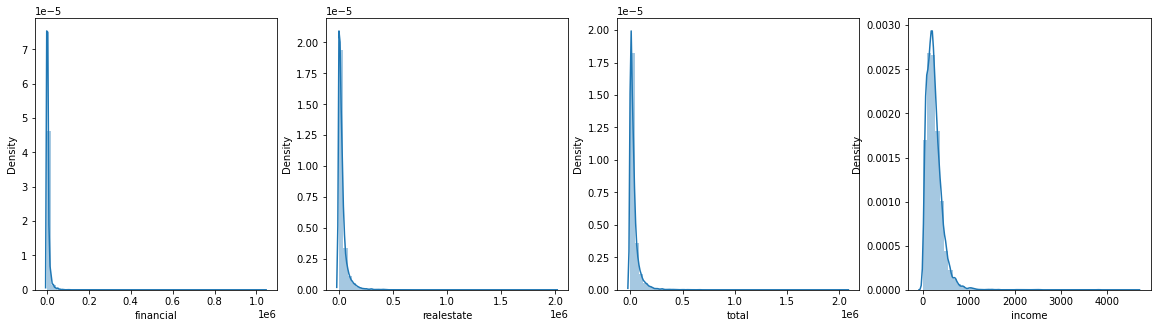

In [129]:
# Distribution
f,ax = plt.subplots(1,4,figsize=(20,5))
sns.distplot(df.financial, ax=ax[0])
sns.distplot(df.realestate, ax=ax[1])
sns.distplot(df.total, ax=ax[2])
sns.distplot(df.income, ax=ax[3])
plt.show()

In [130]:
# log()
df['log_financial'] = np.log(df['financial']+0.1)
df['log_realestate'] = np.log(df['realestate']+0.1)
df['log_total'] = np.log(df['total']+0.1)
df['log_income'] = np.log(df['income']+0.1)

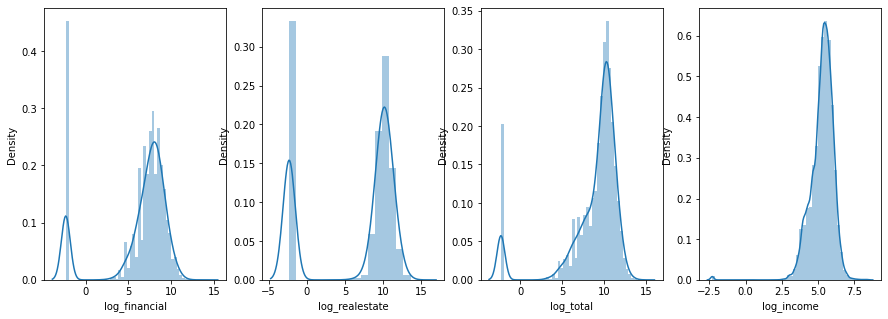

In [131]:
# Distribution
f,ax = plt.subplots(1,4,figsize=(15,5))
sns.distplot(df.log_financial, ax=ax[0])
sns.distplot(df.log_realestate, ax=ax[1])
sns.distplot(df.log_total, ax=ax[2])
sns.distplot(df.log_income, ax=ax[3])
plt.show()

## EDA

### Real-estate

In [132]:
# Financial vs Real-estate
eda = df.copy()
# With residence
total_sum1 = eda.groupby('yearID').mean()[['financial', 'realestate', 'total']]
total_sum1['financial%'] = total_sum1['financial'] / total_sum1['total']
total_sum1['real-estate%'] = total_sum1['realestate'] / total_sum1['total']

# Without residence
eda['realestate_nor'] = eda['house'] + eda['land'] + eda['building']
eda['total_nor'] = eda['financial'] + eda['realestate_nor']
total_sum2 = eda.groupby('yearID').mean()[['financial', 'realestate_nor', 'total_nor']]
total_sum2['financial%'] = total_sum2['financial'] / total_sum2['total_nor']
total_sum2['real-estate%'] = total_sum2['realestate_nor'] / total_sum2['total_nor']


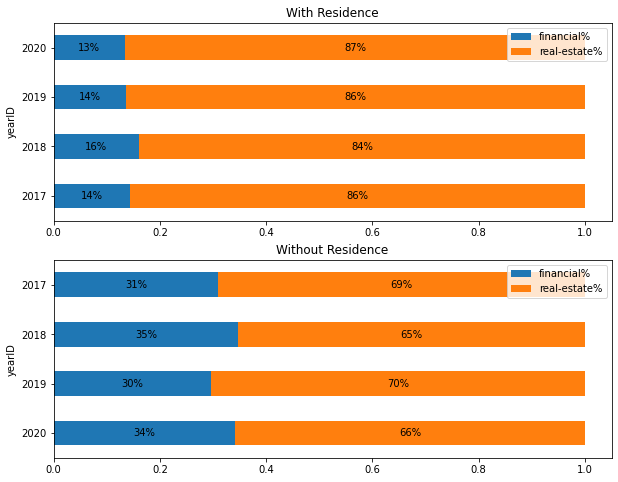

Mean Total: 32503.66857254616


In [19]:
result1 = total_sum1[['financial%','real-estate%']]
result2 = total_sum2[['financial%','real-estate%']]

f,ax = plt.subplots(2,1,figsize=(10,8))

ax[0].set_title('With Residence')
plt.gca().invert_yaxis()
ax0 = result1.plot.barh(stacked=True, ax=ax[0])
for n in ax0.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    ax0.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width*100),
            horizontalalignment='center',
            verticalalignment='center')


ax[1].set_title('Without Residence')

ax1 = result2.plot.barh(stacked=True, ax=ax[1])
plt.gca().invert_yaxis()
for n in ax1.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    ax1.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width*100),
            horizontalalignment='center',
            verticalalignment='center')
plt.show()

print('Mean Total:',df.total.mean())

According to the data, average asset of a household is about 320 million won and about 85% of the total assets are real-estate asset. Without current residence, 60~70% are real-estate asset. This shows that Koreans have high preference for real-estate.

In [20]:
# real-estate with residence
re1 = eda[['yearID']]
for i in re:
    re1[i] = eda[i] / eda['realestate'] * 100

# real-estate without residence
re2 = eda[['yearID']].copy()
for i in ['house','land','building']:
    re2[i] = eda[i] / (eda['house']+eda['land']+eda['building']) * 100

re1 = re1.groupby('yearID').mean()
re2 = re2.groupby('yearID').mean()

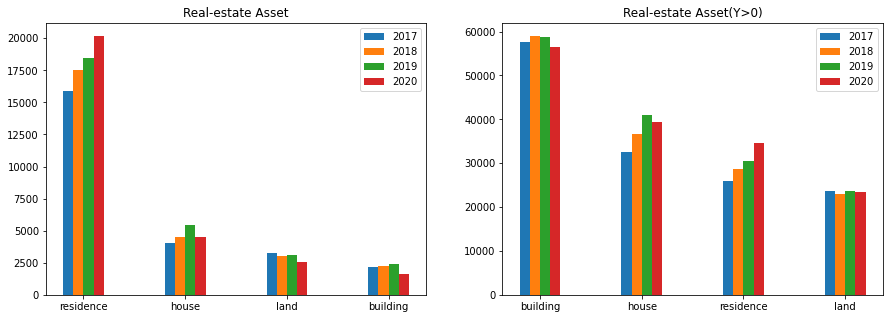

In [21]:
f,ax = plt.subplots(1,2,figsize=(15,5))

# All
for i,j in zip(range(2017, 2021),[-1.5,-0.5,0.5,1.5]):
    result = eda[eda.yearID==i][re].mean().sort_values(ascending=False)
    ticks = np.arange(len(result))
    width = 0.1
    ax[0].bar(ticks + (width*j), result.values, width, label=i)

ax[0].set_xticks(np.arange(4),result.index)
ax[0].set_title('Real-estate Asset')
ax[0].legend()

# if Y > 0
for i,j in zip(range(2017, 2021),[-1.5,-0.5,0.5,1.5]):
    result = eda[eda.yearID==i][re].replace(0,np.NaN).mean().sort_values(ascending=False)
    ticks = np.arange(len(result))
    width = 0.1
    ax[1].bar(ticks + (width*j), result.values, width, label=i)
ax[1].set_xticks(np.arange(4),result.index)
ax[1].set_title('Real-estate Asset(Y>0)')
ax[1].legend()

plt.show()

In [22]:
# Ratio of Asset Owners
ratio = []
for i in re:
    ratio.append(round(eda[eda[i] > 0].shape[0] / eda.shape[0],4))

# Mean and Std of Assets
ds = []
ds.append(eda[re].mean().values)
ds.append(eda[re].replace(0,np.NaN).mean().values)
ds.append(eda[re].std().values)
ds.append(eda[re].replace(0,np.NaN).std().values)
ds = pd.DataFrame(ds,
             index=['mean','mean(Y>0)','std','std(Y>0)'],
             columns=['residence','house','land','building']).T
ds['ratio'] = ratio
ds

,mean,mean(Y>0),std,std(Y>0),ratio
residence,18387.346778,30666.549349,30585.936721,34404.803927,0.5996
house,4613.459657,37794.297563,21093.430352,48904.344943,0.1221
land,2887.685589,23383.057517,17248.257205,43936.011974,0.1235
building,2013.117291,57869.379362,19247.428624,86174.703108,0.0348


The right plot is conditioned to only include observations with value of greater than 0. 

When it is not conditioned, residence has the highest mean value. However, when it is conditioned, the asset with the highest value is 'building' with the mean of 579 million won. 

Considering that std for the unconditioned is relatively lower than the conditioned, we can assume that the overall average of the conditioned are increased by the rich.



### Risk Aversion

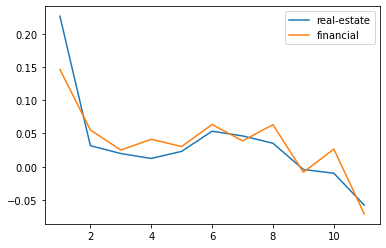

In [202]:
from sklearn.preprocessing import StandardScaler

# scale the features so that we can visually compare them
sc = StandardScaler()
sc_eda = eda.copy()
sc_eda[['realestate','financial','realestate_nor']] = sc.fit_transform(sc_eda[['realestate','financial','realestate_nor']])

re_sc_eda = sc_eda[['riskaversion','realestate']].groupby('riskaversion').mean()
fin_sc_eda = sc_eda[['riskaversion','financial']].groupby('riskaversion').mean()
plt.plot(re_sc_eda, label='real-estate')
plt.plot(fin_sc_eda, label='financial')
plt.legend()
plt.show()

In [216]:
eda.groupby('riskaversion')[info].median()
eda[eda.age<40].groupby('riskaversion')[info].mean()

,female,marriage,age,education,unemployed,wage-employed,self-employed,income
riskaversion,,,,,,,,
1.0,0.046154,0.800000,34.991231,0.646154,0.061538,0.784615,0.153846,312.042292
2.0,0.184211,0.710526,34.947632,0.500000,0.000000,0.894737,0.105263,266.153895
3.0,0.135417,0.750000,35.240938,0.531250,0.010417,0.854167,0.135417,262.732344
4.0,0.155844,0.740260,34.945584,0.655844,0.012987,0.824675,0.162338,294.926929
5.0,0.193333,0.686667,34.680267,0.620000,0.013333,0.806667,0.180000,290.176767
6.0,0.140805,0.735632,35.219569,0.580460,0.022989,0.824713,0.152299,282.204132
7.0,0.136364,0.789773,35.443807,0.653409,0.017045,0.846591,0.136364,285.271176
8.0,0.214592,0.738197,34.752103,0.626609,0.000000,0.862661,0.137339,290.532914
9.0,0.216374,0.707602,34.495497,0.608187,0.005848,0.883041,0.111111,249.194462


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

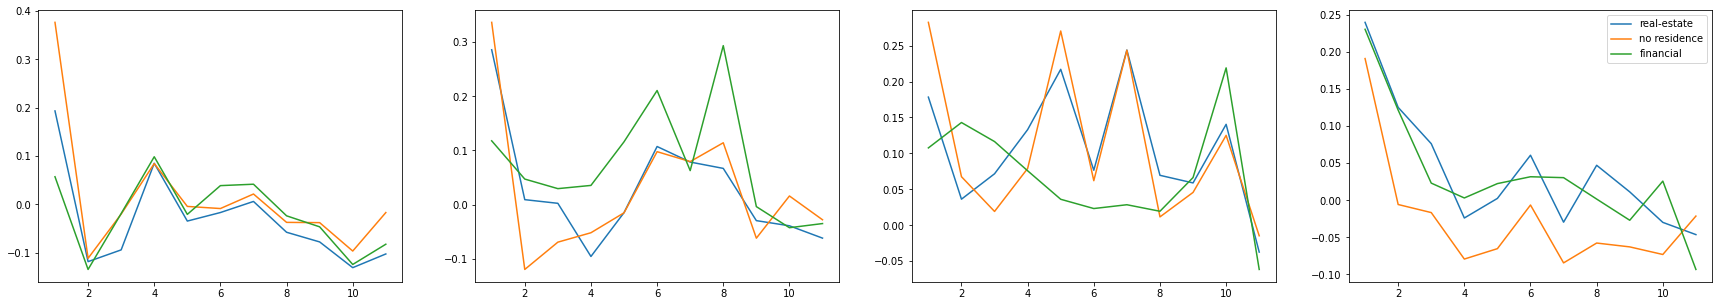

In [205]:
f,ax = plt.subplots(1,4,figsize=(30,5))
for a,i in enumerate(range(2017,2021)):
    re_sc_eda = sc_eda[sc_eda.yearID == i][['riskaversion','realestate']].groupby('riskaversion').mean()
    nore_sc_eda = sc_eda[sc_eda.yearID == i][['riskaversion','realestate_nor']].groupby('riskaversion').mean()
    fin_sc_eda = sc_eda[sc_eda.yearID == i][['riskaversion','financial']].groupby('riskaversion').mean()
    ax[a].plot(re_sc_eda, label='real-estate')
    ax[a].plot(nore_sc_eda, label='no residence')
    ax[a].plot(fin_sc_eda, label='financial')
plt.legend()
ax[0,0].set_ylabel('Real-estate')
ax[1,0].set_ylabel('Financial')
plt.show()

[[0.47832155]]
[[0.50738313]]


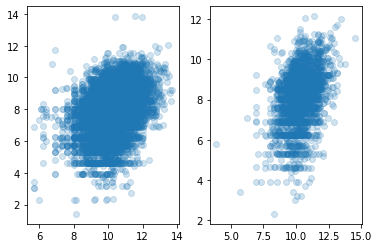

In [183]:
from sklearn.linear_model import LinearRegression
a = eda[(eda.financial > 0) & (eda.realestate > 0) & (eda.riskaversion > 5)]
b = eda[(eda.financial > 0) & (eda.realestate > 0) & (eda.riskaversion <= 5)]

lr = LinearRegression()
lr = lr.fit(a.log_realestate.values.reshape(-1,1), a.log_financial.values.reshape(-1,1))
print(lr.coef_)
lr = lr.fit(b.log_realestate.values.reshape(-1,1), b.log_financial.values.reshape(-1,1))
print(lr.coef_)

f,ax = plt.subplots(1,2)
ax[0].scatter(a.log_realestate, a.log_financial, alpha=0.2)
ax[1].scatter(b.log_realestate, b.log_financial,alpha=0.2)

[]

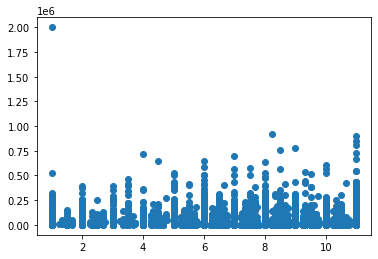

In [24]:
# Risk Aversion vs Real-estate
plt.scatter(eda.riskaversion, eda.realestate)
plt.plot()

f,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].set_title('Financial Asset Proportion')
ax[1].set_title('Except Deposit')

# All assets
a = re1.plot.barh(stacked=True, ax=ax[0])
plt.gca().invert_yaxis() # reverse order(top to down)
for n in a.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    a.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Except deposit asset
b = re2.plot.barh(stacked=True, ax=ax[1])
plt.gca().invert_yaxis() # reverse order(top to down)
for n in b.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    b.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

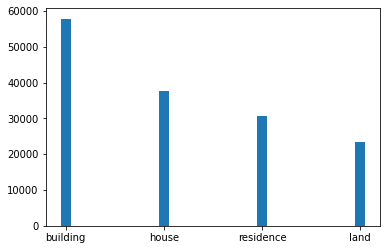

In [25]:
result = eda[re].replace(0,np.NaN).mean().sort_values(ascending=False)
plt.bar(result.index, result.values,width=0.1)
plt.set_title('Real-estate Asset (If Y>0)')

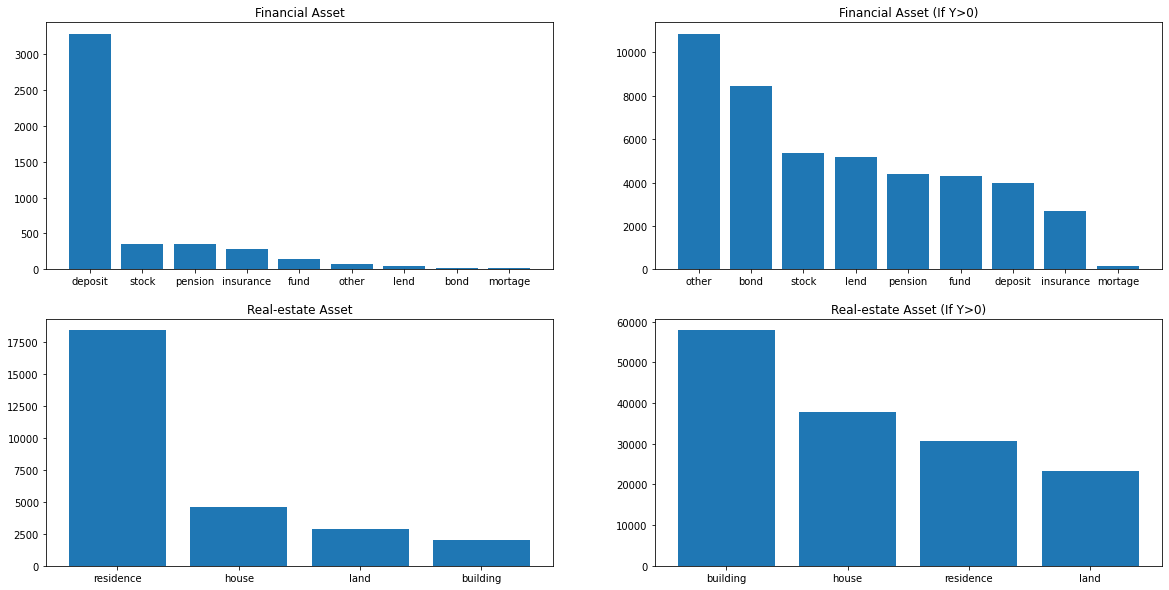

In [ ]:
# Asset Proportion
f,ax = plt.subplots(2,2,figsize=(20,10))
result = eda[fin].mean().sort_values(ascending=False)
ax[0,0].bar(result.index, result.values)
ax[0,0].set_title('Financial Asset')

result = eda[fin].replace(0,np.NaN).mean().sort_values(ascending=False)
ax[0,1].bar(result.index, result.values)
ax[0,1].set_title('Financial Asset (If Y>0)')

result = eda[re].mean().sort_values(ascending=False)
ax[1,0].bar(result.index, result.values)
ax[1,0].set_title('Real-estate Asset')

result = eda[re].replace(0,np.NaN).mean().sort_values(ascending=False)
ax[1,1].bar(result.index, result.values)
ax[1,1].set_title('Real-estate Asset (If Y>0)')

plt.show()

yearID            2017      2018      2019      2020
riskaversion  7.721702  8.309393  8.643829  7.884869


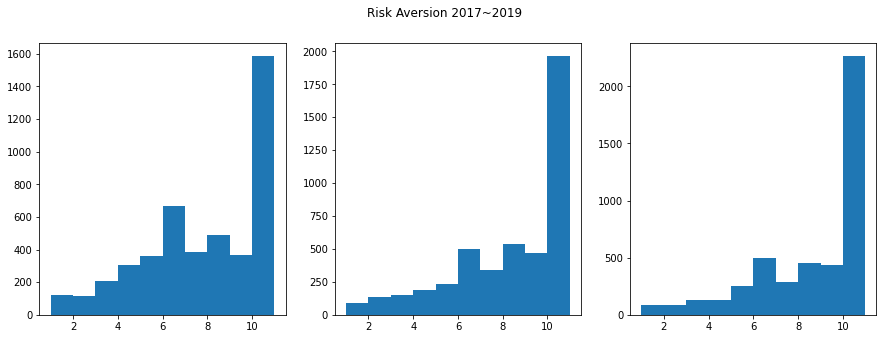

In [ ]:
print(df[['yearID','riskaversion']].groupby('yearID').mean().T)

f,ax = plt.subplots(1,3, figsize=(15,5))
plt.suptitle('Risk Aversion 2017~2019')
ax[0].hist(df[df['yearID']==2017]['riskaversion'])
ax[1].hist(df[df['yearID']==2018]['riskaversion'])
ax[2].hist(df[df['yearID']==2019]['riskaversion'])
plt.show()

In [ ]:
# Find percentage of each assets by year
ratio_a = df[['yearID']].copy()
for i in df[finname]:
    ratio_a[i] = df[i] / df['total_a'].copy() * 100

ratio_b = df[['yearID']].copy()
for i in df.loc[:,'fund':'pension']:
    ratio_b[i] = df[i] / df['total_b'].copy() * 100

ratio_a = ratio_a.groupby('yearID').mean()
ratio_b = ratio_b.groupby('yearID').mean()

NameError: name 'finname' is not defined

## Analysis

1. See how Risk Aversion affect asset portfolio (financial vs real-estate)
2. See what specific assets are affected by individual risk aversion rate

In [ ]:
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from tobit import *

In [ ]:
df['age2'] = df['age']**2 
df['ratio'] = df['f_total'] / df['total']
log_df = df.copy()
log_df = log_df[log_df.total != 0]
log_df = log_df[log_df['risk aversion'].isna() == False]
log_df[['income','f_total','r_total','total']] = np.log(log_df[['income','f_total','r_total','total']])

In [ ]:
x = log_df[['yearID','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income']].values
y = log_df['ratio'].values
features = ['yearID','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income']

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
a = pd.DataFrame(x, columns=['2017','2018','2019','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income'])
a['y'] = y
a = a.drop(columns='2019')

In [ ]:
features = ['2017','2018','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income']
sm.OLS(a['y'], a[features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.489
Method:                 Least Squares   F-statistic:                              1108.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                        0.00
Time:                        21:28:56   Log-Likelihood:                         -6096.9
No. Observations:               12725   AIC:                                  1.222e+04
Df Residuals:                   12714   BIC:                                  1.230e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
2017              0.0212      0.009      2.485      0.013       0.004       0.038
2018              0.0178      0.008      2.105      0.035       0.001       0.034
risk aversion     0.0102      0.001      8.137      0.000       0.008       0.013
female            0.0912      0.011      8.024      0.000       0.069       0.113
marriage         -0.1967      0.011    -17.924      0.000      -0.218      -0.175
age               0.0184      0.001     22.412      0.000       0.017       0.020
age2             -0.0002   9.01e-06    -22.368      0.000      -0.000      -0.000
education         0.0531      0.008      6.672      0.000       0.038       0.069
wage-employed     0.0635      0.012      5.264      0.000       0.040       0.087
self-employed    -0.0104      0.012     -0.853      0.393      -0.034       0.013
income        -6.726e-05   1.94e-05     -3.467      0.001      -0.000   -2.92e-05
==============================================================================
Omnibus:                     2592.495   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1309.278
Skew:                           0.639   Prob(JB):                    4.94e-285
Kurtosis:                       2.087   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
demean = log_df.copy()

In [ ]:
demean['']

In [ ]:
tr = tobit()

NameError: name 'tobit' is not defined

In [ ]:
tr = TobitModel()

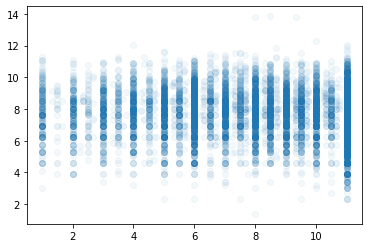

In [ ]:
plt.scatter(log_df['risk aversion'],log_df.f_total, alpha=0.05)

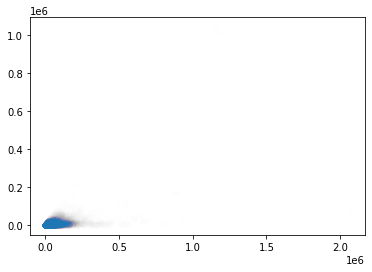

In [ ]:
result = tr.fit()